In [1]:
import pandas as pd
import numpy as np
import matplotlib as mth

In [2]:
df_gas = pd.read_csv('C:/Users/ednae/Documents/Linguagens/data2/df_gas.csv')

C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,3,7,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Tratamento inicial
- ## Ajuste de tipo das datas
- ## Ordenação por data
- ## Mudança do index

In [3]:
df_gas['Data da Coleta']=pd.to_datetime(df_gas['Data da Coleta'],format="%d/%m/%Y")
df_gas.sort_values('Data da Coleta',inplace=True)
df_gas.set_index('Data da Coleta',drop=False,inplace=True)
df_gas.rename_axis('Período',inplace=True)

# Remoção de dados desnecessários e/ou incompletos

In [4]:
df_gas.isna().sum()

Período                    0
Regiao - Sigla        146151
Estado - Sigla             0
Municipio             146151
Revenda                    0
CNPJ da Revenda            0
Nome da Rua                0
Numero Rua            148238
Complemento          2682576
Bairro                 11970
Cep                        0
Produto                    0
Data da Coleta             0
Valor de Venda             0
Valor de Compra      2074799
Unidade de Medida          0
Bandeira                   0
Região - Sigla       3435492
Município            3435492
Número Rua           3435557
dtype: int64

In [5]:
df_gas.drop(['Municipio','Complemento'],axis=1,inplace=True)
df_gas.drop(['Bandeira'],axis=1,inplace=True)
df_gas.drop(['Município','Cep','Número Rua','Numero Rua','Regiao - Sigla','Região - Sigla'],axis=1,inplace=True)

- ## Informações acerca da coleta
- ## Contagens

<AxesSubplot:>

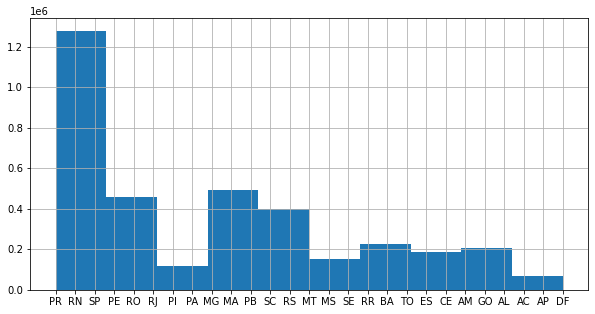

In [6]:
df_gas['Estado - Sigla'].hist(figsize=(10,5))

In [75]:
labels=list(df_gas['Estado - Sigla'].value_counts())

In [85]:
a=sum(labels)

In [89]:
pct_label=[(x/a)*100 for x in labels]

<AxesSubplot:>

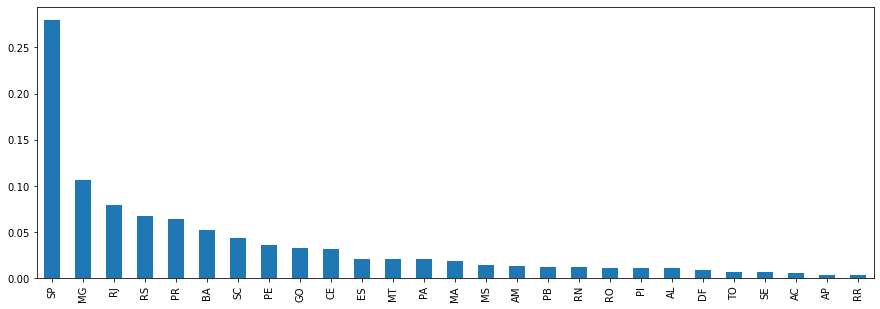

In [96]:
(df_gas['Estado - Sigla'].value_counts()/3581643).plot.bar(figsize=(15,5),label=pct_label[1])
#colocar em cima de cada barra o valor percentual

## Preparação para visualização

In [120]:
df_gas2 = pd.DataFrame(df_gas['Valor de Venda'].resample('D').mean())

In [163]:
df_gas2.loc['2011':'2015','Valor de Venda'].describe()

count    1021.000000
mean        2.955317
std         0.243940
min         2.557515
25%         2.774002
50%         2.884516
75%         3.020747
max         3.736336
Name: Valor de Venda, dtype: float64

Text(0.5, 0, 'Período do controle de preço')

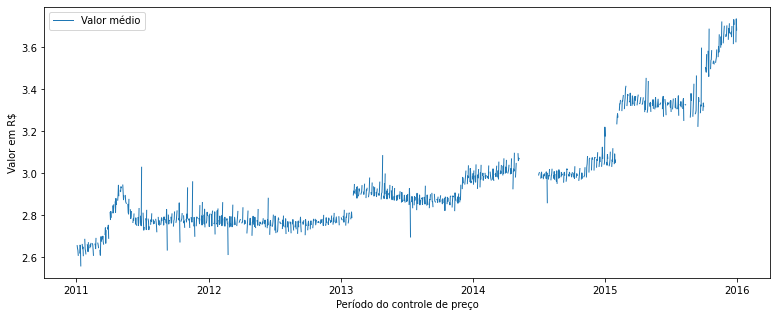

In [162]:
plt.figure(figsize=(13,5))
plt.plot(df_gas2.loc['2011':'2015','Valor de Venda'],markersize=8,linestyle='-',linewidth=1,label='Valor médio')
plt.legend()
plt.ylabel('Valor em R$')
plt.xlabel('Período do controle de preço')

In [122]:
df_gas2['pct_change']=df_gas2.pct_change()

## Plot: Todas as observações diárias e mensais

<AxesSubplot:xlabel='Período'>

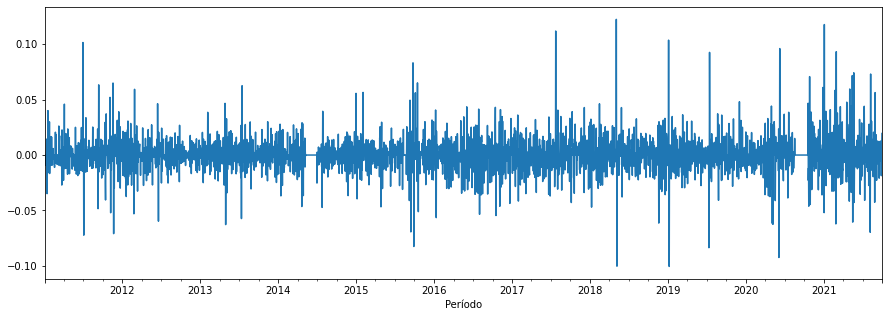

In [125]:
df_gas2['pct_change'].plot(figsize=(15,5))

## Reorganizando a série

In [126]:
dif_med_semanal = df_gas2['pct_change'].resample('W').mean()
dif_med_diaria = df_gas2['pct_change'].resample('D').mean() #agora cada dia virou uma soh observacao
dif_med_mensal = df_gas2['pct_change'].resample('M').mean()
print(dif_med_semanal.shape)
print(dif_med_diaria.shape)
print(dif_med_mensal.shape)

(561,)
(3924,)
(129,)


### COMPORTAMENTO NO CONTROLE DE PREÇO

Text(0.5, 0, 'Período do controle de preço')

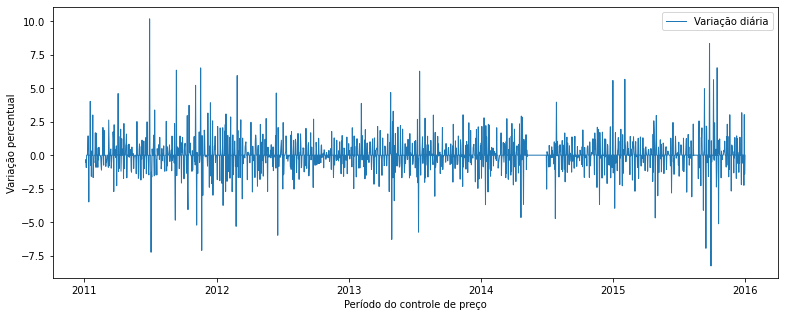

In [155]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,5))
plt.plot(dif_med_diaria.loc['2011':'2015']*100,markersize=8,linestyle='-',linewidth=1,label='Variação diária')
plt.legend()
plt.ylabel('Variação percentual')
plt.xlabel('Período do controle de preço')

In [128]:
print(dif_med_diaria.loc['2011':'2015'].max()*100)
print(dif_med_diaria.loc['2011':'2015'].min()*100)

10.160038331451759
-8.256460794490316


Text(0.5, 0, 'Período do controle de preço')

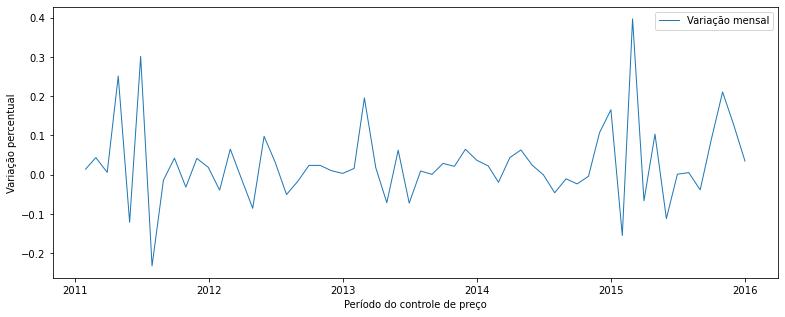

In [160]:
plt.figure(figsize=(13,5))
plt.plot(dif_med_mensal.loc['2011':'2015']*100,markersize=8,linestyle='-',linewidth=1,label='Variação mensal')
#plt.plot(dif_med_semanal.loc['2011':'2015']*100,marker='.',linestyle='-',linewidth=1,markersize=5,alpha=0.5,label='Variação semanal')
plt.legend()
plt.ylabel('Variação percentual')
plt.xlabel('Período do controle de preço')

In [130]:
print(dif_med_semanal.loc['2011':'2015'].max()*100)
print(dif_med_semanal.loc['2011':'2015'].min()*100)
print(dif_med_mensal.loc['2011':'2015'].max()*100)
print(dif_med_mensal.loc['2011':'2015'].min()*100)

1.1242248788964007
-1.3816817624160094
0.39707343739115164
-0.23241983975174577


### Decomposição da série - sazonalidade e tendência

In [132]:
#REMOÇÃO DE NA'S anterior-p´roximo-1
dif_med_diaria.dropna(inplace=True)
dif_med_semanal.dropna(inplace=True)
dif_med_mensal.dropna(inplace=True)

<AxesSubplot:xlabel='Período'>

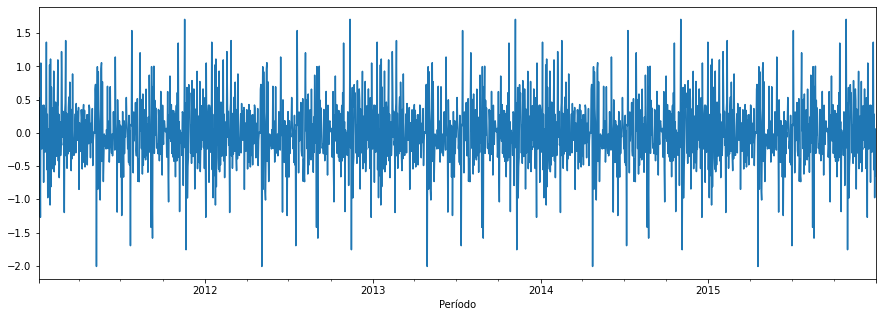

In [133]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(dif_med_diaria.loc[:'2015']*100, model='additive', period=360) #por possuir valores abaixo de
result.seasonal.plot(figsize=(15,5))

<AxesSubplot:xlabel='Período'>

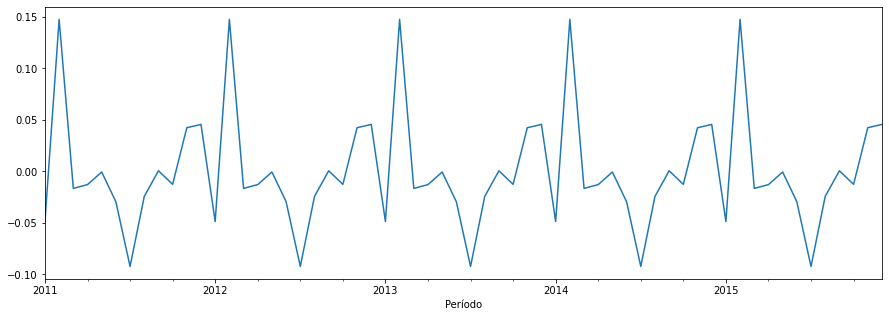

In [158]:
result2=seasonal_decompose(dif_med_mensal.loc[:'2015']*100, model='additive', period=12)
result2.seasonal.plot(figsize=(15,5))

<AxesSubplot:xlabel='Período'>

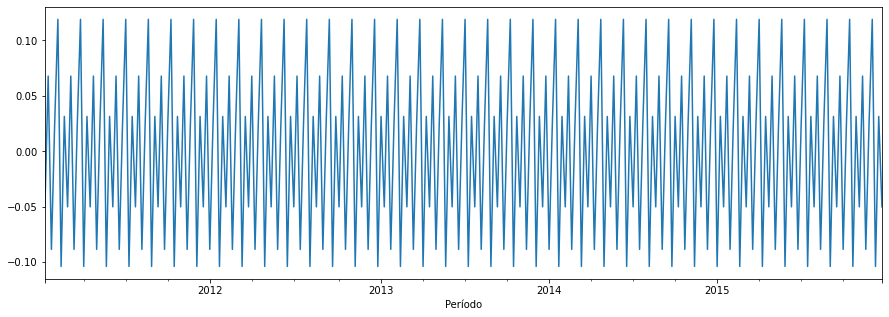

In [136]:
result3=seasonal_decompose(dif_med_semanal.loc[:'2015']*100, model='additive', period=7)
result3.seasonal.plot(figsize=(15,5))


<AxesSubplot:xlabel='Período'>

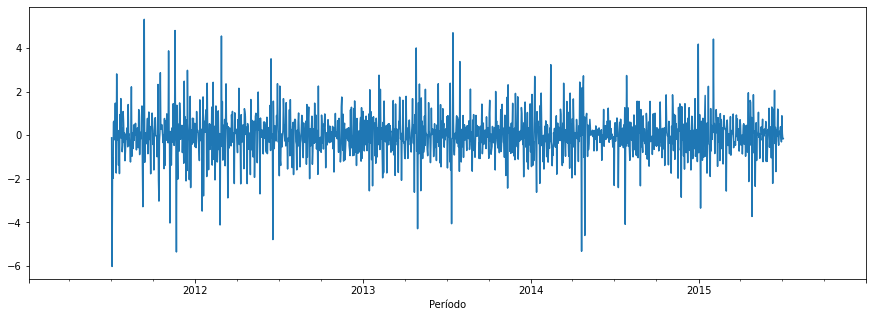

In [137]:
result.resid.plot(figsize=(15,5))

### COMPORTAMENTO NO PPI

Text(0.5, 0, 'Período do PPI (incluindo pandemia)')

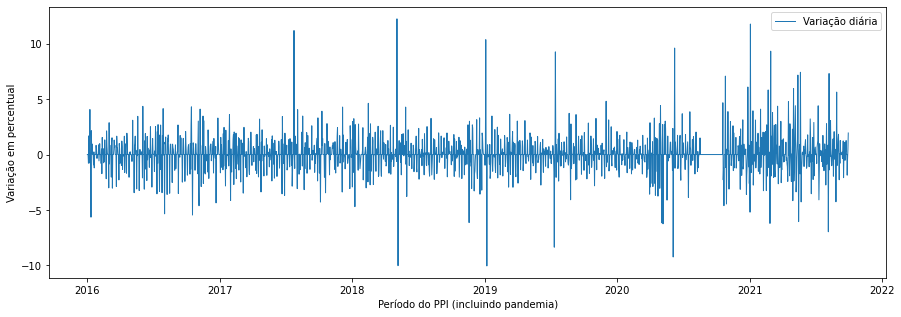

In [159]:
plt.figure(figsize=(15,5))
plt.plot(dif_med_diaria.loc['2016':]*100,markersize=8,linestyle='-',linewidth=1,label='Variação diária')
plt.legend()
plt.ylabel('Variação em percentual')
plt.xlabel('Período do PPI (incluindo pandemia)')

In [150]:
print(dif_med_diaria.loc['2016':].max()*100)
print(dif_med_diaria.loc['2016':].min()*100)

12.251304645880756
-10.058834313355403


Text(0.5, 0, 'Período do PPI (incluindo pandemia)')

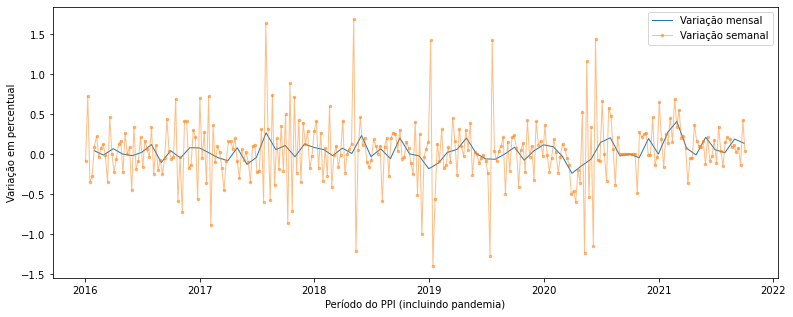

In [140]:
plt.figure(figsize=(13,5))
plt.plot(dif_med_mensal.loc['2016':]*100,markersize=8,linestyle='-',linewidth=1,label='Variação mensal')
plt.plot(dif_med_semanal.loc['2016':]*100,marker='.',linestyle='-',linewidth=1,markersize=5,alpha=0.5,label='Variação semanal')
plt.legend()
plt.ylabel('Variação em percentual')
plt.xlabel('Período do PPI (incluindo pandemia)')

In [141]:
print(dif_med_semanal.loc['2016':].max()*100)
print(dif_med_semanal.loc['2016':].min()*100)
print(dif_med_mensal.loc['2016':].max()*100)
print(dif_med_mensal.loc['2016':].min()*100)

1.6908899588545023
-1.400323261457689
0.40818488478250514
-0.24084659992833274


In seasonal_decompose we have to set the model. We can either set the model to be Additive or Multiplicative. A rule of thumb for selecting the right model is to see in our plot if the trend and seasonal variation are relatively constant over time, in other words, linear. If yes, then we will select the Additive model. Otherwise, if the trend and seasonal variation increase or decrease over time then we use the Multiplicative model.

explicação do uso do modelo multiplicativo - buscar mais referencias

<AxesSubplot:xlabel='Período'>

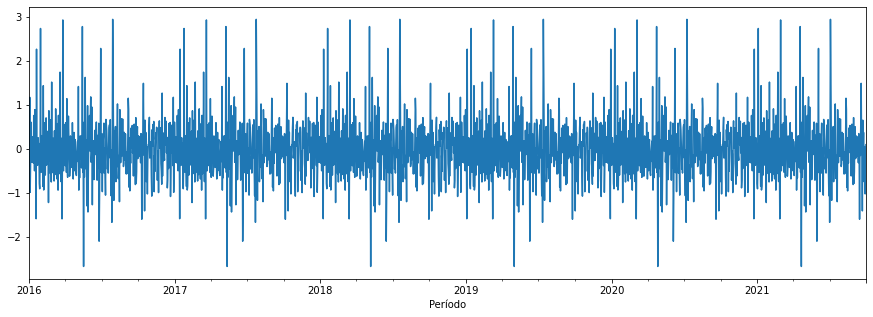

In [156]:
result=seasonal_decompose(dif_med_diaria.loc['2016':]*100, model='additive', period=360)
result.seasonal.plot(figsize=(15,5))


<AxesSubplot:xlabel='Período'>

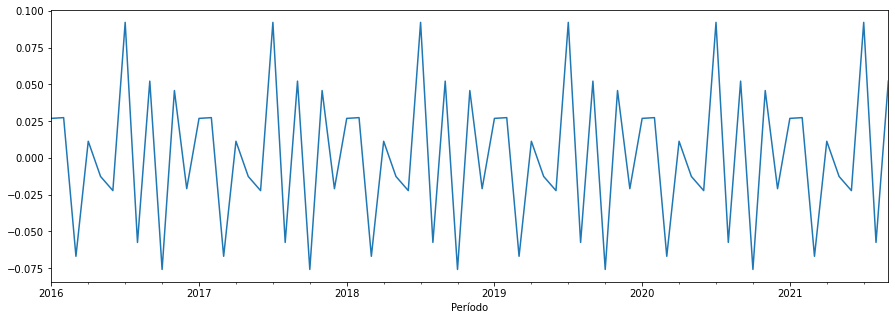

In [157]:
result2=seasonal_decompose(dif_med_mensal.loc['2016':]*100, model='additive', period=12)
result2.seasonal.plot(figsize=(15,5))

<AxesSubplot:xlabel='Período'>

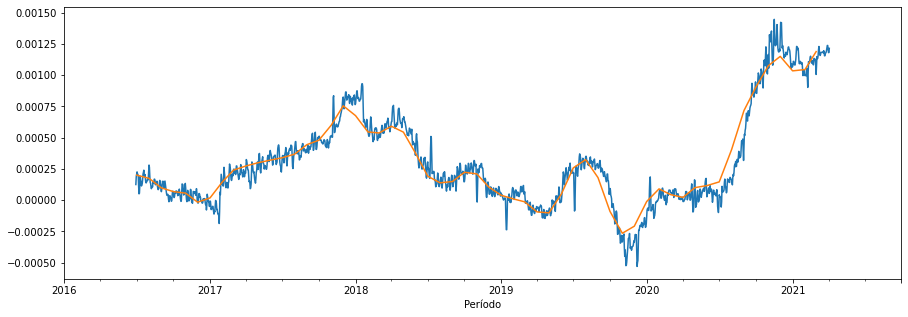

In [144]:
result.trend.plot(figsize=(15,5))
result2.trend.plot(figsize=(15,5))

<AxesSubplot:xlabel='Período'>

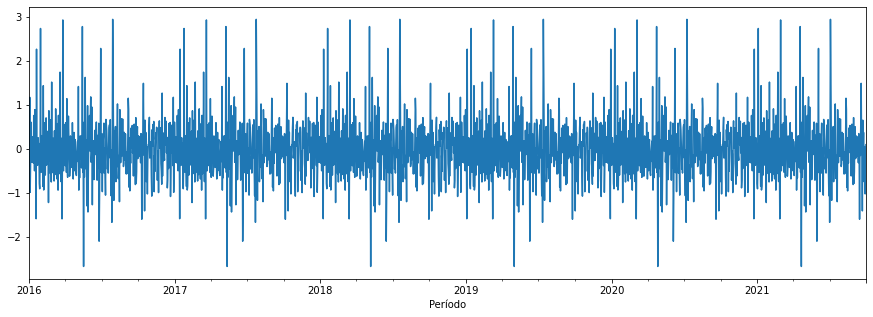

In [145]:
result=seasonal_decompose(dif_med_diaria.loc['2016':]*100, model='additive', period=360)
result.seasonal.plot(figsize=(15,5))

<AxesSubplot:xlabel='Período'>

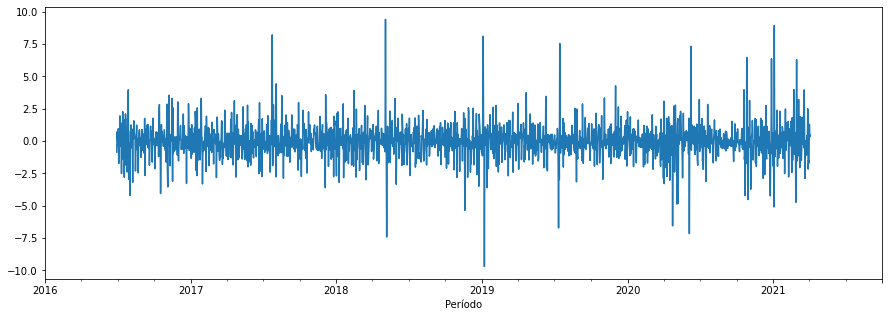

In [146]:
result.resid.plot(figsize=(15,5))